# デルタ分布の理解を深めるための演習

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from scipy.stats import norm

## デルタ分布の性質
1. $\delta(x = 0)$の時、$\infty$が得られる。それ以外は0
2. $\delta(x = 0)$は積分すると、面積(確率)は1となる

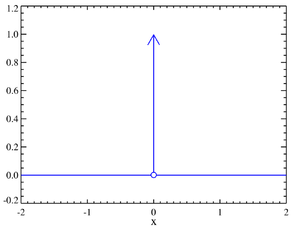

### 例：）以下の式を満たす$\hat{P}^N_{data}(x)$をグラフとして表示するPythonコードを書け。
**$\hat{P}^N_{data}(x) = \frac{1}{N}\sum_{i = 1}^{N}\delta(x - xi)$は経験分布から得られたデータがあるデータ点xである確率**

この時、x = 165.0
経験分布からは日本の成人男女の100人分の(140cm ~ 200cm)までのランダムな身長{$x_1, x_2, x_3...x_n$}が得られたとする
$$
\hat{P}^N_{data}(x) = \frac{1}{N}\sum_{i = 1}^{N}\delta(x - xi)
$$

ステップ１：まずは、ランダムな身長をサンプリングする。また、この標本は正規分布に従うものとする

In [16]:
# データ数100個の標準正規分布を抽出
size=100
normal_samples = np.random.normal(loc=0, scale=1, size=size)
# 標準正規分布から正規分布に正規化
min_sample = 140
max_sample = 200
mu = (min_sample + max_sample) / 2
# この6はプラマイ3σのときに全タータの99.7%が収まることから最大値から最小値の間を6で割ることで1σあたりの値を近似する
sigma = (max_sample - min_sample) / 6 
samples = mu  + (normal_samples * sigma )
# xiの小数点以下を四捨五入
samples = np.array(list(map(lambda x: int(x), samples)))
print(samples)

[176 173 177 168 160 167 168 182 151 151 160 183 181 166 168 188 164 166
 164 185 153 174 177 163 182 160 169 170 175 154 170 175 158 186 175 168
 169 174 160 167 156 181 143 192 176 156 169 183 162 166 168 173 168 168
 167 166 165 167 159 187 161 173 173 178 171 173 171 195 157 180 171 179
 177 175 165 189 159 185 180 162 168 170 164 180 161 160 157 166 170 163
 170 182 164 164 153 192 177 170 162 157]


In [30]:
N = len(samples) 
x_values = range(min_sample, max_sample+1, 1)

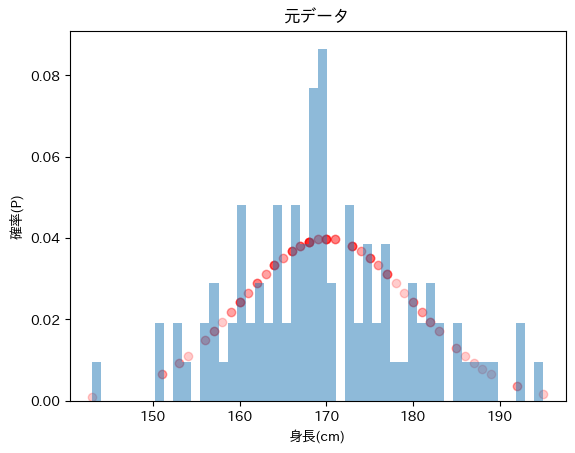

In [ ]:
# 確率密度関数を適用し、正規分布の確率密度を計算
probability_density = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((samples - mu)**2) / (2 * sigma**2)) 

plt.scatter(samples, probability_density, alpha=0.2, label="Scatter (Raw Samples)", c="red")  # 点描画
plt.hist(samples, bins=50, density=True, alpha=0.5, label="Histogram")  # ヒストグラム
plt.title("元データ")
plt.xlabel("身長(cm)")
plt.ylabel("確率(P)")
plt.show()

In [31]:
# デルタ分布の近似
def delta_approx(x_target, xi):
    if x_target - xi == 0:
        return 1
    else:
        return 0

x = 157とし、経験分布から身長が157cmである確率を求める。なお、この確率計算にはデルタ関数を使用する

In [32]:
# 各 x に対する確率を計算
x_target = 157
probabirty = sum([delta_approx(x_target, xi) for xi in samples]) / N

y_values = np.zeros_like(samples)
y_values = [probabirty if x_target == xi else 0 for xi in samples]
print(y_values)
print(samples)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03]
[176 173 177 168 160 167 168 182 151 151 160 183 181 166 168 188 164 166
 164 185 153 174 177 163 182 160 169 170 175 154 170 175 158 186 175 168
 169 174 160 167 156 181 143 192 176 156 169 183 162 166 168 173 168 168
 167 166 165 167 159 187 161 173 173 178 171 173 171 195 157 180 171 179
 177 175 165 189 159 185 180 162 168 170 164 180 161 160 157 166 170 163
 170 182 164 164 153 192 177 170 162 157]


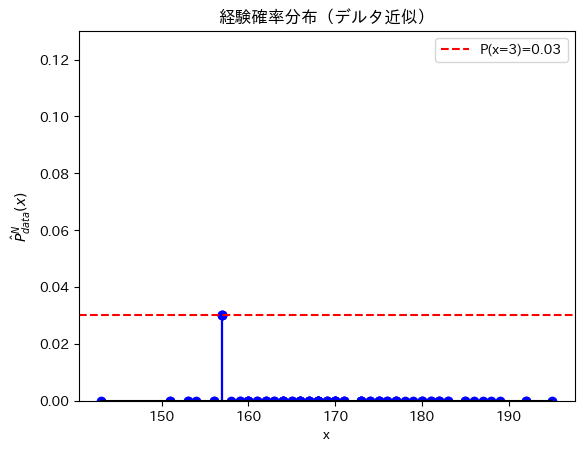

In [33]:
# グラフの描画
plt.stem(samples, y_values, basefmt="k", linefmt="b", markerfmt="bo")
plt.xlabel("x")
plt.ylabel(r"$\hat{P}^N_{data}(x)$")
plt.title("経験確率分布（デルタ近似）")
plt.xticks()
plt.ylim(0, max(y_values) + 0.1)
plt.axhline(y=probabirty, color='r', linestyle='--', label=f'P(x=3)={probabirty}')
plt.legend()
plt.show()

ブートストラップ法を使ってxをランダムに変えながら、経験分布から得られるデータがxである確率計算をm回分繰り返す(経験分布は予め抽出したsamplesを使いわます)

In [34]:
need_sample_num = 1000
unique_samples = np.unique(samples)
bootstrap_df = pd.DataFrame(columns=["x", "P(x)"])
bootstrap_df["x"] = unique_samples

for i in range(need_sample_num):
    x_target = np.random.choice(samples) # ここで基準となるデータ点xをランダムに選択する
    bootstrap_df.loc[bootstrap_df["x"] == x_target, "P(x)"] =+ sum([delta_approx(x_target, xi) for xi in samples]) / N # ここで確率を計算する
print(bootstrap_df)

      x  P(x)
0   143  0.01
1   151  0.02
2   153  0.02
3   154  0.01
4   156  0.02
5   157  0.03
6   158  0.01
7   159  0.02
8   160  0.05
9   161  0.02
10  162  0.03
11  163  0.02
12  164  0.05
13  165  0.02
14  166  0.05
15  167  0.04
16  168  0.08
17  169  0.03
18  170  0.06
19  171  0.03
20  173  0.05
21  174  0.02
22  175  0.04
23  176  0.02
24  177  0.04
25  178  0.01
26  179  0.01
27  180  0.03
28  181  0.02
29  182  0.03
30  183  0.02
31  185  0.02
32  186  0.01
33  187  0.01
34  188  0.01
35  189  0.01
36  192  0.02
37  195  0.01


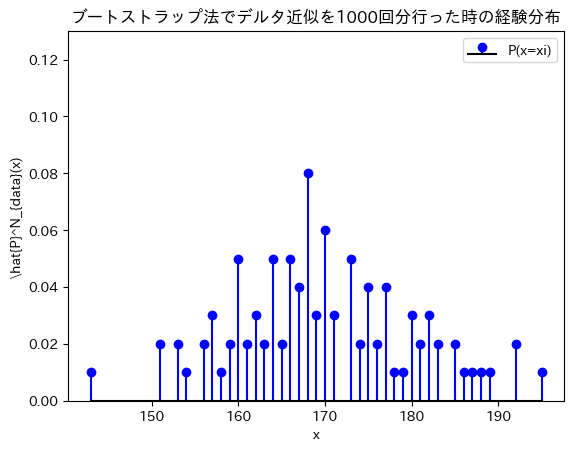

In [40]:
plt.stem(bootstrap_df["x"].to_numpy(), bootstrap_df["P(x)"].to_numpy(), basefmt="k", linefmt="b", markerfmt="bo",label=f'P(x=xi)')
plt.xlabel("x")
plt.ylabel(r"\hat{P}^N_{data}(x)")
plt.title(f"ブートストラップ法でデルタ近似を{need_sample_num}回分行った時の経験分布")
plt.ylim(0, max(y_values) + 0.1)
plt.legend()
plt.show()

In [42]:
print(bootstrap_df["P(x)"].sum())

1.0000000000000004
